[-8.5, -6.5, -8.5, -6.5, -8.5, -6.5, -8.5, -6.5, -8.5, -6.5, -6.5, -8.5, -6.5, -8.5, -6.5, -8.5, -6.5, -8.5, -6.5, -8.5]
[1.0, 2.333333333333333, 3.6666666666666665, 5.0, 6.333333333333333, 7.666666666666666, 9.0, 10.333333333333332, 11.666666666666666, 13.0, 13.0, 11.666666666666666, 10.333333333333332, 9.0, 7.666666666666666, 6.333333333333333, 5.0, 3.6666666666666665, 2.333333333333333, 1.0]


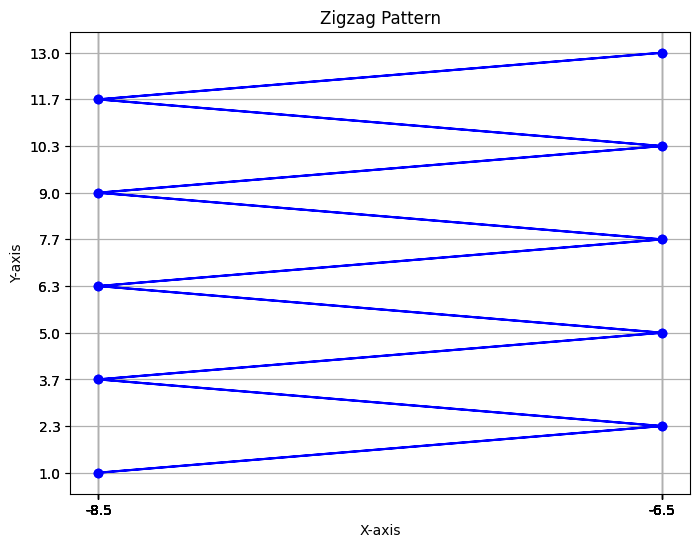

In [4]:
import matplotlib.pyplot as plt
from geometry_msgs.msg import Point

class ZigzagGenerator:
    def __init__(self):
        self.waypoints = []

    def create_zigzag(self, depth, num_points, start_x, start_y, target_height, width):
        # Calculate the amplitude based on the total distance and number of points
        amplitude = abs(depth) / (num_points - 1)
        
        # Generate y coordinates
        y_coords = [start_y + i * amplitude for i in range(num_points)]
        
        # Initialize x coordinates with the starting position
        x_coords = [start_x]
        
        # Start with right movement
        direction = 1
        
        # Generate x coordinates to form a zigzag pattern
        for i in range(1, num_points):
            next_x = x_coords[-1] + direction * width
            x_coords.append(next_x)
            direction *= -1  # Switch direction
            
        # Append the coordinates to self.waypoints as Point objects
        self.waypoints = [Point(x=x, y=y, z=target_height) for x, y in zip(x_coords, y_coords)]

    def draw_zigzag(self):
        # Extract x, y, and z coordinates from waypoints
        x_coords = [point.x for point in self.waypoints]
        y_coords = [point.y for point in self.waypoints]
        
        # Append reversed lists to the lists
        x_coords.extend(x_coords[::-1])
        y_coords.extend(y_coords[::-1])

        print(x_coords)
        print(y_coords)
        plt.figure(figsize=(8, 6))
        
        # Plot the zigzag line
        plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
        
        # Set plot title and labels
        plt.title('Zigzag Pattern')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        
        # Show grid
        plt.grid(True)
        
        # Add more numbers on the x and y axes
        plt.xticks(ticks=x_coords, labels=["{:.1f}".format(x) for x in x_coords])
        plt.yticks(ticks=y_coords, labels=["{:.1f}".format(y) for y in y_coords])
        
        # Display the plot
        plt.show()

# Example usage
zigzag_gen = ZigzagGenerator()
num_points = 10
start_x = -8.5
start_y = 1.0
target_height = 5.0  # Adjust this as needed
depth = 12.0  # The depth, i.e., the final y-coordinate
width = 2.0  # Adjust the width as needed

zigzag_gen.create_zigzag(depth, num_points, start_x, start_y, target_height, width)
zigzag_gen.draw_zigzag()
